## Q2 Modelling 2020 

In [1]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
import os
import glob
from pathlib import Path

In [3]:
home = str(Path.home())

os.getcwd()
old_dir = os.getcwd()
print(os.getcwd())


C:\Users\imeld\work\ML-Project


In [4]:
# constant value switches
MAKE_FILES=True
READ_FILES = True
FILE_MASK = "dublinbikes*.csv"
#FILE_MASK = "dublinbikes_2021*.csv"

In [5]:
#full_data.to_csv("data/full_data.csv", index= False)

In [6]:
# write out full data to csv file
#if MAKE_FILES : full_data.to_csv("data/full_data.csv", index= False)
#if READ_FILES : full_data = pd.read_csv("data/full_data.csv")
data = pd.read_csv("data/station_data.csv")

print(data.sample(3))


         STATION ID                 TIME LAST UPDATED  \
1678534          30  2021-09-23 12:45:27     12:38:23   
1851657          52  2020-02-13 22:05:02     22:02:33   
111230           89  2019-09-12 01:15:02     22:09:33   

                            NAME  BIKE STANDS  AVAILABLE BIKES STATUS  \
1678534     PARNELL SQUARE NORTH           20               10   Open   
1851657         YORK STREET EAST           32                1   Open   
111230   FITZWILLIAM SQUARE EAST           40                1   Open   

         include  cluster    usage  ...       date_for_merge OCCUPANCY_PCT  \
1678534     True      2.0  0.00000  ...  2021-09-23 13:00:00       0.50000   
1851657     True      1.0  0.03125  ...  2020-02-13 22:00:00       0.03125   
111230      True      0.0  0.00000  ...  2019-09-11 22:00:00       0.02500   

        FULL  EMPTY  DAY_NUMBER  DAY_TYPE  TIME_TYPE HOUR MONTH  YEAR  
1678534    0      0           3   Weekday  11AM-3PM    12     9  2021  
1851657    0      0  

In [7]:
print(data.columns.values)
print(data.head(1))
print(data['NAME'].unique())

['STATION ID' 'TIME' 'LAST UPDATED' 'NAME' 'BIKE STANDS' 'AVAILABLE BIKES'
 'STATUS' 'include' 'cluster' 'usage' 'DATETIME' 'DATE' 'date_for_merge'
 'OCCUPANCY_PCT' 'FULL' 'EMPTY' 'DAY_NUMBER' 'DAY_TYPE' 'TIME_TYPE' 'HOUR'
 'MONTH' 'YEAR']
   STATION ID                 TIME LAST UPDATED                     NAME  \
0          89  2018-08-01 12:30:02     12:19:52  FITZWILLIAM SQUARE EAST   

   BIKE STANDS  AVAILABLE BIKES STATUS  include  cluster  usage  ...  \
0           40               37   Open     True      0.0    NaN  ...   

        date_for_merge OCCUPANCY_PCT FULL  EMPTY  DAY_NUMBER  DAY_TYPE  \
0  2018-08-01 12:00:00         0.925    0      0           2   Weekday   

   TIME_TYPE HOUR MONTH  YEAR  
0  11AM-3PM    12     8  2018  

[1 rows x 22 columns]
['FITZWILLIAM SQUARE EAST' 'HANOVER QUAY' 'MATER HOSPITAL'
 'NEW CENTRAL BANK' 'PARNELL SQUARE NORTH' 'YORK STREET EAST']


In [39]:
data = data.sort_values(by=['NAME', 'datetime'], ascending = True)

#To estimate how the city-bike usage would have been without the pandemic (e.g., 2020)

In [45]:
# get absolute value of diff in available bikes from t-1 to t & normalise
data['usage'] = abs(data['AVAILABLE BIKES'].diff())/data['BIKE STANDS']

In [46]:
data.to_csv("data/station_data.csv", index = False)

In [41]:
pd.crosstab(index=data['NAME'], columns = data['cluster'] )

cluster,0.0,1.0,2.0
NAME,,,
FITZWILLIAM SQUARE EAST,340191,0,0
HANOVER QUAY,341793,0,0
MATER HOSPITAL,0,0,340854
NEW CENTRAL BANK,0,341270,0
PARNELL SQUARE NORTH,0,0,341593
YORK STREET EAST,0,341632,0


In [42]:
data.describe()

,STATION ID,BIKE STANDS,AVAILABLE BIKES,cluster,usage,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,HOUR,MONTH,YEAR,day_number,hour,month,week,year,dayIndex
count,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047332e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06,2.047333e+06
mean,6.381083e+01,3.532811e+01,1.144178e+01,1.000226e+00,8.828392e-03,3.133428e-01,1.147908e-01,1.005015e-02,3.001226e+00,1.146683e+01,6.995045e+00,2.019765e+03,3.001262e+00,1.148091e+01,6.995039e+00,2.870915e+01,2.019765e+03,6.290014e+02
std,1.888625e+01,7.456008e+00,9.912913e+00,8.163598e-01,2.443451e-02,2.596465e-01,3.187694e-01,9.974541e-02,2.000778e+00,6.913744e+00,3.404744e+00,1.019833e+00,2.000790e+00,6.919339e+00,3.404752e+00,1.485883e+01,1.019838e+00,3.646495e+02
min,3.000000e+01,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.018000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.018000e+03,0.000000e+00
25%,5.200000e+01,3.200000e+01,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,4.000000e+00,2.019000e+03,1.000000e+00,5.000000e+00,4.000000e+00,1.600000e+01,2.019000e+03,2.980000e+02
50%,6.600000e+01,4.000000e+01,9.000000e+00,1.000000e+00,0.000000e+00,2.750000e-01,0.000000e+00,0.000000e+00,3.000000e+00,1.100000e+01,7.000000e+00,2.020000e+03,3.000000e+00,1.100000e+01,7.000000e+00,3.100000e+01,2.020000e+03,6.470000e+02
75%,7.800000e+01,4.000000e+01,1.700000e+01,2.000000e+00,0.000000e+00,4.750000e-01,0.000000e+00,0.000000e+00,5.000000e+00,1.700000e+01,1.000000e+01,2.021000e+03,5.000000e+00,1.700000e+01,1.000000e+01,4.100000e+01,2.021000e+03,9.450000e+02
max,8.900000e+01,4.000000e+01,4.300000e+01,2.000000e+00,1.000000e+00,1.075000e+00,1.000000e+00,1.000000e+00,6.000000e+00,2.300000e+01,1.200000e+01,2.022000e+03,6.000000e+00,2.300000e+01,1.200000e+01,5.300000e+01,2.022000e+03,1.249000e+03


In [47]:
data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKES,STATUS,cluster,usage,DATETIME,...,time,date,day_number,day_type,time_type,hour,month,week,year,dayIndex
0,89,2018-08-01 12:30:02,12:19:52,FITZWILLIAM SQUARE EAST,40,37,Open,0.0,NaN,2018-08-01 12:19:52,...,12:30:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
1,89,2018-08-01 12:35:02,12:31:35,FITZWILLIAM SQUARE EAST,40,36,Open,0.0,0.025,2018-08-01 12:31:35,...,12:35:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
2,89,2018-08-01 12:40:02,12:34:03,FITZWILLIAM SQUARE EAST,40,37,Open,0.0,0.025,2018-08-01 12:34:03,...,12:40:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
3,89,2018-08-01 12:45:02,12:34:03,FITZWILLIAM SQUARE EAST,40,37,Open,0.0,0.000,2018-08-01 12:34:03,...,12:45:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
4,89,2018-08-01 12:50:02,12:45:54,FITZWILLIAM SQUARE EAST,40,37,Open,0.0,0.000,2018-08-01 12:45:54,...,12:50:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0


In [44]:
ct1 = pd.crosstab(index = data['STATION ID'], columns = data['NAME'])
ct1

NAME,FITZWILLIAM SQUARE EAST,HANOVER QUAY,MATER HOSPITAL,NEW CENTRAL BANK,PARNELL SQUARE NORTH,YORK STREET EAST
STATION ID,,,,,,
30,0,0,0,0,341593,0
52,0,0,0,0,0,341632
66,0,0,0,341270,0,0
68,0,341793,0,0,0,0
78,0,0,340854,0,0,0
89,340191,0,0,0,0,0


Based on the clustering the location stations choosen were: 
- 'HANOVER QUAY' in Grand Canal Dock (blue) + FITZWILLIAM SQUARE EAST
- 'YORK STREET EAST' in south Dublin  (red) + 'NEW CENTRAL BANK'
- 'MATER HOSPITAL'- north side, hospital (green) (rotunda parnell st north)

In [17]:
def mapLocations(data) :
    locations  = data[['LATITUDE', 'LONGITUDE', 'cluster']].drop_duplicates()
    #data.sample(50)
    colordict = {0: 'blue', 1: 'red', 2: 'green'}
    dublin_map = folium.Map([53.345, -6.2650], zoom_start=13.0)

    for LATITUDE, LONGITUDE, cluster in zip(locations['LATITUDE'],locations['LONGITUDE'],locations['cluster']):
        folium.CircleMarker(
            [LATITUDE, LONGITUDE],
            color = 'b',
            radius = 8,
            fill_color=colordict[cluster],
            fill=True,
            fill_opacity=0.9
            ).add_to(dublin_map)
    dublin_map   

### expl vars

In [18]:
data.sample(5)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKES,STATUS,include,cluster,usage,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,YEAR
1913454,52,2020-09-15 23:30:02,23:26:33,YORK STREET EAST,32,0,Open,True,1.0,0.0,...,2020-09-15 23:00:00,0.00000,1,0,1,Weekday,Overnight,23,9,2020
237592,89,2020-12-28 20:25:02,20:17:33,FITZWILLIAM SQUARE EAST,40,24,Open,True,0.0,0.0,...,2020-12-28 20:00:00,0.60000,0,0,0,Weekday,8PM-11PM,20,12,2020
943634,78,2021-03-25 05:55:02,05:44:57,MATER HOSPITAL,40,14,Open,True,2.0,0.0,...,2021-03-25 06:00:00,0.35000,0,0,3,Weekday,Overnight,5,3,2021
1758021,52,2019-01-31 01:30:01,01:23:19,YORK STREET EAST,32,1,Open,True,1.0,0.0,...,2019-01-31 01:00:00,0.03125,0,0,3,Weekday,Overnight,1,1,2019
357926,68,2018-10-02 09:10:02,09:02:58,HANOVER QUAY,40,33,Open,True,0.0,0.0,...,2018-10-02 09:00:00,0.82500,0,0,1,Weekday,6AM-10AM,9,10,2018


In [106]:
#cluster stations
#data = data[data['STATUS'] == 'Open']

#?
#remove rows where no update actually occurs
#data = data.drop(['LAST UPDATED'], axis = 1)
data.drop_duplicates(keep= 'first',inplace=True)

dates = [dt.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in data["TIME"]]
#get date and time columns
data['datetime'] = dates
data['time'] = data.datetime.dt.time
#data['time'] = [dt.datetime.time(d) for d in data['DATETIME']] 
data['date'] = data.datetime.dt.date
#data['date'] = [dt.datetime.date(d) for d in data['DATETIME']] 
data['date_for_merge'] = data.datetime.dt.round('d')

startDate = min(dates).date()
### create time aggregates needed for clustering
# weekday/saturday/sunday
data['day_number'] = data.datetime.dt.dayofweek
data['day_type'] = np.where(data['day_number'] <= 4, 'Weekday', (np.where(data['day_number'] == 5, 'Saturday', 'Sunday')))

def bin_time(x):
    if x.time() < dt.time(6):
        return "Overnight "
    elif x.time() < dt.time(11):
        return "6AM-10AM "
    elif x.time() < dt.time(16):
        return "11AM-3PM "
    elif x.time() < dt.time(20):
        return "4PM-7PM "
    elif x.time() <= dt.time(23):
        return "8PM-11PM "
    else:
        return "Overnight "

data["time_type"] = data.datetime.apply(bin_time)
data['hour'] = data.datetime.dt.hour
data['month'] = data.datetime.dt.month
data['week'] = data.datetime.dt.week
data['year'] = data.datetime.dt.year
data['dayIndex'] = [(d - startDate).days for d in data['date']]
data['yearWeek'] = data.year *100+data.week


data.sample(5)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKES,STATUS,cluster,usage,DATETIME,...,time,date,day_number,day_type,time_type,hour,month,week,year,dayIndex
1862375,52,2020-03-22 16:00:02,15:52:18,YORK STREET EAST,32,10,Open,1.0,0.000,2020-03-22 15:52:18,...,16:00:02,2020-03-22,6,Sunday,4PM-7PM,16,3,12,2020,599
309562,89,2021-09-11 07:55:02,07:52:30,FITZWILLIAM SQUARE EAST,40,16,Open,0.0,0.000,2021-09-11 07:52:30,...,07:55:02,2021-09-11,5,Saturday,6AM-10AM,7,9,36,2021,1137
1237561,66,2020-10-09 07:10:03,07:05:51,NEW CENTRAL BANK,40,16,Open,1.0,0.000,2020-10-09 07:05:51,...,07:10:03,2020-10-09,4,Weekday,6AM-10AM,7,10,41,2020,800
1922854,52,2020-10-18 12:15:02,12:12:52,YORK STREET EAST,32,25,Open,1.0,0.000,2020-10-18 12:12:52,...,12:15:02,2020-10-18,6,Sunday,11AM-3PM,12,10,42,2020,809
524354,68,2020-06-25 17:45:02,17:43:52,HANOVER QUAY,40,19,Open,0.0,0.025,2020-06-25 17:43:52,...,17:45:02,2020-06-25,3,Weekday,4PM-7PM,17,6,26,2020,694


In [23]:
data = data.drop(columns='include')

## Create Test and Training sets

In [49]:
test_data = data[data['YEAR']>= 2020]
test_data.to_csv("data/test.csv", index=False)
pd.crosstab(index=test_data['NAME'], columns = data['cluster'])
del test_data

In [50]:
#training set
training_data = data[data['YEAR'] < 2020]
#len(training_data)
training_data.to_csv("data/training.csv", index=False)

In [51]:
pd.crosstab(index=[training_data['NAME'],training_data['year']], columns = data['cluster'])


cluster                         0.0    1.0    2.0
NAME                    year                     
FITZWILLIAM SQUARE EAST 2018  43663      0      0
                        2019  95551      0      0
HANOVER QUAY            2018  43663      0      0
                        2019  95687      0      0
MATER HOSPITAL          2018      0      0  43663
                        2019      0      0  95718
NEW CENTRAL BANK        2018      0  43663      0
                        2019      0  95751      0
PARNELL SQUARE NORTH    2018      0      0  43663
                        2019      0      0  95537
YORK STREET EAST        2018      0  43663      0
                        2019      0  95593      0

In [28]:
#print(training_data.describe())
pd.crosstab(index=training_data['NAME'], columns=training_data['YEAR'])
pd.crosstab(index=training_data['NAME'], columns=[training_data['BIKE STANDS'],training_data['cluster']])
pd.crosstab([training_data['NAME'], training_data['BIKE STANDS'], training_data['STATION ID']],training_data['cluster'])

,,cluster,0.0,1.0,2.0
NAME,BIKE STANDS,STATION ID,,,
FITZWILLIAM SQUARE EAST,40,89,139214,0,0
HANOVER QUAY,40,68,139350,0,0
MATER HOSPITAL,40,78,0,0,139381
NEW CENTRAL BANK,40,66,0,139414,0
PARNELL SQUARE NORTH,20,30,0,0,139200
YORK STREET EAST,32,52,0,139256,0


array([datetime.date(2019, 12, 15), datetime.date(2019, 12, 16),
       datetime.date(2019, 12, 17), datetime.date(2019, 12, 22),
       datetime.date(2019, 12, 23), datetime.date(2019, 12, 24),
       datetime.date(2019, 12, 25), datetime.date(2019, 12, 30),
       datetime.date(2019, 12, 31), datetime.date(2020, 1, 1),
       datetime.date(2020, 1, 3), datetime.date(2020, 1, 4),
       datetime.date(2020, 1, 5), datetime.date(2020, 1, 6),
       datetime.date(2020, 1, 13), datetime.date(2020, 1, 14),
       datetime.date(2020, 1, 23), datetime.date(2020, 1, 24),
       datetime.date(2020, 1, 25), datetime.date(2020, 1, 27),
       datetime.date(2020, 1, 28), datetime.date(2020, 1, 29),
       datetime.date(2020, 1, 30), datetime.date(2020, 1, 31),
       datetime.date(2020, 2, 1)], dtype=object)

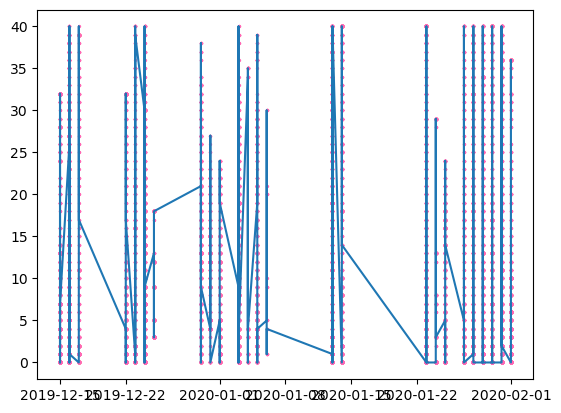

In [126]:
df = data.copy()
from datetime import date
range_start = date(2019, 12, 15)
range_end = date(2020, 2, 1)

m = (df.date >= range_start) & (df.date <= range_end)
df_short = df[m].sort_values(by='datetime')
plt.plot(df_short.date,df_short['AVAILABLE BIKES'])
#colors = np.array([0, 4.0, 8.0, 12.0, 16.0, 20, 24.0, 28, 32.0, 36.0, 40])
#, c=colors, cmap='viridis'
plt.scatter(df_short.date,df_short['AVAILABLE BIKES'], s=2, color='hotpink')
#color='hotpink'
df_short.date.unique()

#df.drop(columns=["ADDRESS","LATITUDE","LONGITUDE","AVAILABLE BIKE STANDS"],axis=1)  #,inplace=True

In [ ]:
#12: 18-21,  26-29
#01: 2, 7 - 12, 15-22, 26, 

In [53]:
psq = df[df['NAME']== 'PARNELL SQUARE NORTH']

In [54]:
psq.head(5)

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKES,STATUS,cluster,usage,DATETIME,...,time,date,day_number,day_type,time_type,hour,month,week,year,dayIndex
1364108,30,2018-08-01 12:30:02,12:26:48,PARNELL SQUARE NORTH,20,0,Open,2.0,0.15,2018-08-01 12:26:48,...,12:30:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
1364109,30,2018-08-01 12:35:02,12:32:14,PARNELL SQUARE NORTH,20,1,Open,2.0,0.05,2018-08-01 12:32:14,...,12:35:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
1364110,30,2018-08-01 12:40:02,12:32:14,PARNELL SQUARE NORTH,20,1,Open,2.0,0.00,2018-08-01 12:32:14,...,12:40:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
1364111,30,2018-08-01 12:45:02,12:42:23,PARNELL SQUARE NORTH,20,1,Open,2.0,0.00,2018-08-01 12:42:23,...,12:45:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0
1364112,30,2018-08-01 12:50:02,12:42:23,PARNELL SQUARE NORTH,20,1,Open,2.0,0.00,2018-08-01 12:42:23,...,12:50:02,2018-08-01,2,Weekday,11AM-3PM,12,8,31,2018,0


In [ ]:
#plt.plot(psq.date,psq.usage, "b")
#plt.plot(df.date,df.usage, "b")

In [113]:
# Let's get the standard deviation reflecting the change of bike availability within each hour-block of data
#data_byDay = df.groupby('cluster').resample('d', on= 'date').std()
data_byDay = df.groupby('cluster').resample('d', on= 'date_for_merge').std()
data_byDay = data_byDay.rename(columns={'date_for_merge': 'Day'})
# Reset index names
data_byDay = data_byDay.drop(columns ='cluster')
data_byDay = data_byDay.reset_index()
#Change the time to hours only to make it easier to read
#data_byDay.TIME = data_byDay.TIME.dt.hour

#data_byDay = data_byDay[['cluster', 'usage', 'date_for_merge']]
data_byDay


,cluster,date_for_merge,STATION ID,BIKE STANDS,AVAILABLE BIKES,usage,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,HOUR,MONTH,YEAR,day_number,hour,month,week,year,dayIndex
0,0.0,2018-08-02,10.509321,0.000000,15.154774,0.050133,0.378869,0.452035,0.042108,0.500416,7.006082,0.000000,0.000000,0.500331,7.001261,0.000000,0.000000,0.000000,0.500331
1,0.0,2018-08-03,10.509126,0.000000,13.492784,0.039921,0.337320,0.387844,0.000000,0.500423,6.914564,0.000000,0.000000,0.500435,6.928203,0.000000,0.000000,0.000000,0.500435
2,0.0,2018-08-04,10.509126,0.000000,9.419558,0.039321,0.235489,0.361755,0.000000,0.500423,6.932884,0.000000,0.000000,0.500435,6.928203,0.000000,0.000000,0.000000,0.500435
3,0.0,2018-08-05,10.509126,0.000000,4.876202,0.016601,0.121905,0.449150,0.000000,0.500423,6.920783,0.000000,0.000000,0.500435,6.928203,0.000000,0.000000,0.000000,0.500435
4,0.0,2018-08-06,10.509126,0.000000,6.597562,0.016528,0.164939,0.109663,0.000000,3.002535,6.924702,0.000000,0.000000,3.002608,6.928203,0.000000,0.500435,0.000000,0.500435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,2.0,2021-12-29,24.020860,10.008692,11.994145,0.026526,0.277269,0.000000,0.000000,0.500407,6.915381,0.000000,0.000000,0.500435,6.928203,0.000000,0.000000,0.000000,0.500435
3746,2.0,2021-12-30,24.020860,10.008692,7.097519,0.012531,0.133486,0.000000,0.000000,0.500407,6.920871,0.000000,0.000000,0.500435,6.928203,0.000000,0.000000,0.000000,0.500435
3747,2.0,2021-12-31,24.020860,10.008692,8.198577,0.016605,0.212761,0.478676,0.000000,0.500386,6.912187,0.000000,0.000000,0.500435,6.928203,0.000000,0.000000,0.000000,0.500435
3748,2.0,2022-01-01,24.020860,10.008692,7.590956,0.012043,0.177166,0.109663,0.000000,0.500407,6.906316,5.504482,0.500407,0.500435,6.928203,5.504781,0.000000,0.500435,0.500435


In [114]:
#data_byDay = data_byDay[['cluster', 'usage', 'dayIndex']]

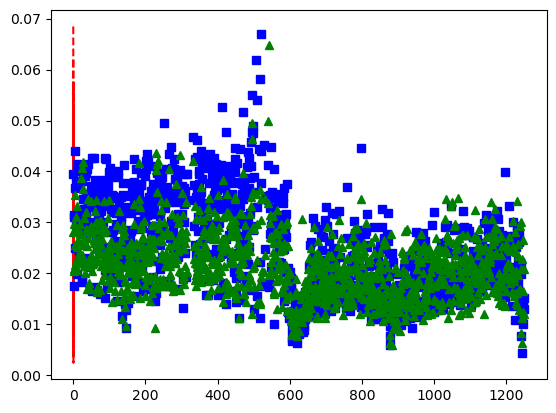

In [115]:

m = data_byDay['cluster'] == 0
#data2plot = data_byDay[['cluster', 'usage', 'date_for_merge']]
data2plot = data_byDay[['cluster', 'usage', 'dayIndex']]
data2plot0 = data_byDay[data_byDay['cluster'] == 0]
data2plot1 = data_byDay[data_byDay['cluster'] == 1]
data2plot2 = data_byDay[data_byDay['cluster'] == 2]

plt.plot(np.array(data2plot0)[:,2], np.array(data2plot0)[:,1], 'r--', \
            np.array(data2plot1)[:,1], 'bs', np.array(data2plot2)[:,1], 'g^')
#plt.plot(data2plot)
plt.show()

In [123]:
data_byDay.cluster.unique()

array([0., 1., 2.])

In [124]:
#Bike usage or not = our 'answers' [True or False]
#y = np.array(data_byDay['usage']>0)
y = np.array(data_byDay['usage'])

#Features: STATION ID and HOUR of the DAY
X = np.array(data_byDay.drop(['usage'], 1).astype(float))


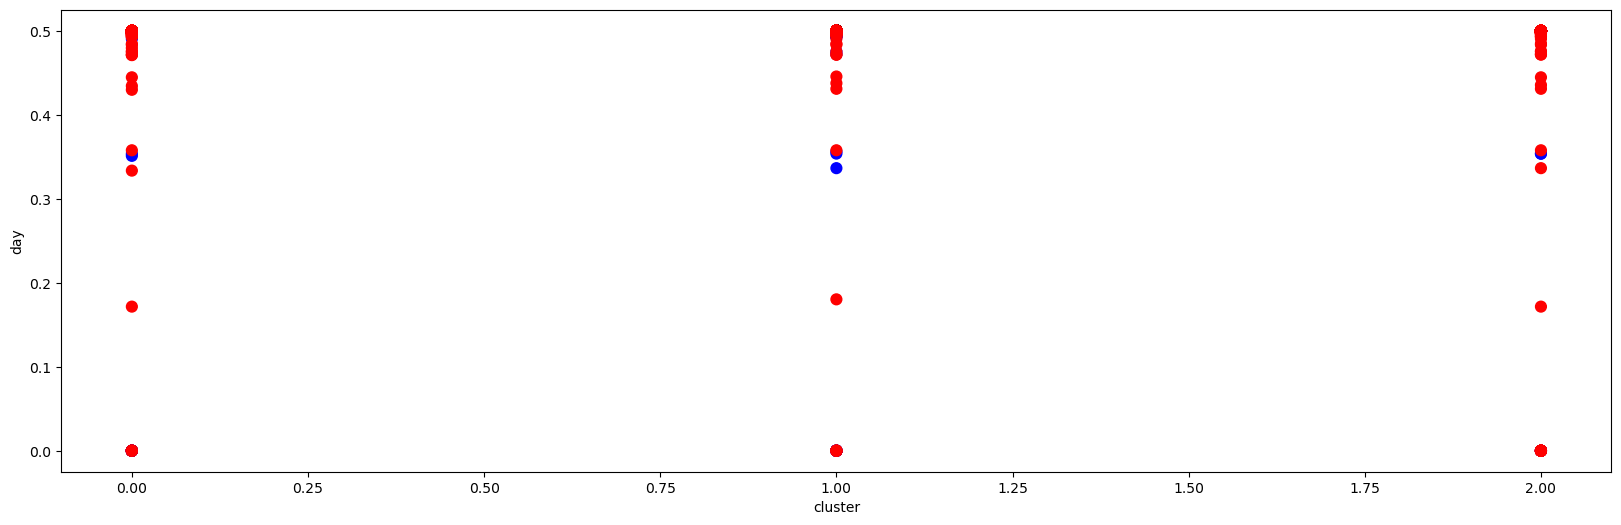

In [125]:
plt.figure(figsize=(20, 6))
#color map to make it pretty
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=60)
plt.xlabel('cluster')
plt.ylabel('day')
plt.show()

## model results


In [163]:
df = training_data.copy()

In [129]:
df = df.drop(columns = {'NAME','STATUS', 'BIKE STANDS', 'LAST UPDATED',"AVAILABLE BIKES"})



In [165]:
#df = df.drop(columns={})
df=df.dropna(axis=0)
print(df.usage.unique())

[0.025   0.      0.05    0.125   0.075   0.175   0.25    0.1     0.15
 0.275   0.325   0.45    0.225   0.2     0.3     0.35    0.375   0.425
 0.4     0.5     0.8     0.65    0.55    0.475   0.525   0.85    0.825
 0.95    0.775   0.725   0.6     0.925   0.7     0.28125 0.03125 0.0625
 0.09375 0.4375  0.1875  0.15625 0.46875 0.625   0.3125  0.5625  0.40625
 0.21875 0.59375 0.53125 0.34375 0.6875  0.65625 1.      0.71875]


In [166]:
# Let's get the standard deviation reflecting the change of bike availability within each hour-block of data
data_byDay = df.groupby('cluster').resample('d', on= 'datetime').std()
#data_byDay = data_byDay.rename(columns={'AVAILABLE BIKES': 'BIKES AVAILABILITY CHANGE'})
# Reset index names
data_byDay = data_byDay.drop(columns ='cluster')
data_byDay = data_byDay.reset_index()
#Change the time to hours only to make it easier to read
data_byDay.datetime = data_byDay.datetime.dt.date

data_byDay


,cluster,datetime,STATION ID,BIKE STANDS,AVAILABLE BIKES,usage,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,HOUR,MONTH,YEAR,day_number,hour,month,week,year,dayIndex
0,0.0,2018-08-01,10.519074,0.000000,14.296765,0.057777,0.357419,0.367274,0.060302,0.000000,3.322050,0.0,0.0,0.0,3.320012,0.0,0.0,0.0,0.0
1,0.0,2018-08-02,10.509126,0.000000,14.223131,0.042156,0.355578,0.458047,0.000000,0.072043,6.920416,0.0,0.0,0.0,6.928203,0.0,0.0,0.0,0.0
2,0.0,2018-08-03,10.509126,0.000000,12.770573,0.044016,0.319264,0.353246,0.000000,0.058874,6.922898,0.0,0.0,0.0,6.928203,0.0,0.0,0.0,0.0
3,0.0,2018-08-04,10.509126,0.000000,5.990750,0.019047,0.149769,0.442967,0.000000,0.058874,6.922508,0.0,0.0,0.0,6.928203,0.0,0.0,0.0,0.0
4,0.0,2018-08-05,10.509126,0.000000,4.721919,0.016213,0.118048,0.327024,0.000000,0.058874,6.916224,0.0,0.0,0.0,6.928203,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,2.0,2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,2.0,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1551,2.0,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,2.0,2019-12-30,24.028487,10.011869,6.459180,0.016106,0.150114,0.349649,0.000000,0.000000,5.086060,0.0,0.0,0.0,5.085581,0.0,0.0,0.0,0.0


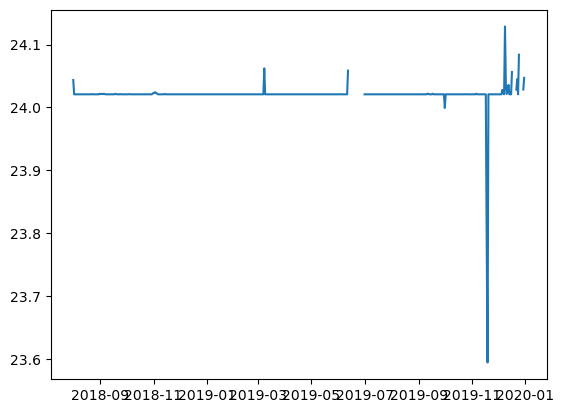

In [167]:
maskSpecificStation = data_byDay['cluster'] == 2
data2plot = data_byDay[maskSpecificStation] # columns: 0:STATION ID, 1:idx, 2:change

#Plot
plt.plot(np.array(data2plot)[:,1],np.array(data2plot)[:,2])
plt.show()

In [168]:
data_byDay.head(2)
data_byDay = data_byDay[['cluster', 'usage', 'dayIndex', 'month']]
data_byDay.head(2)


,cluster,usage,dayIndex,month
0,0.0,0.057777,0.0,0.0
1,0.0,0.042156,0.0,0.0


In [169]:
#Bike usage or not = our 'answers' [True or False]

y = np.array(data_byDay['usage']>0)

#Features: STATION ID and HOUR of the DAY
X = np.array(data_byDay.drop(['usage'], 1).astype(float))


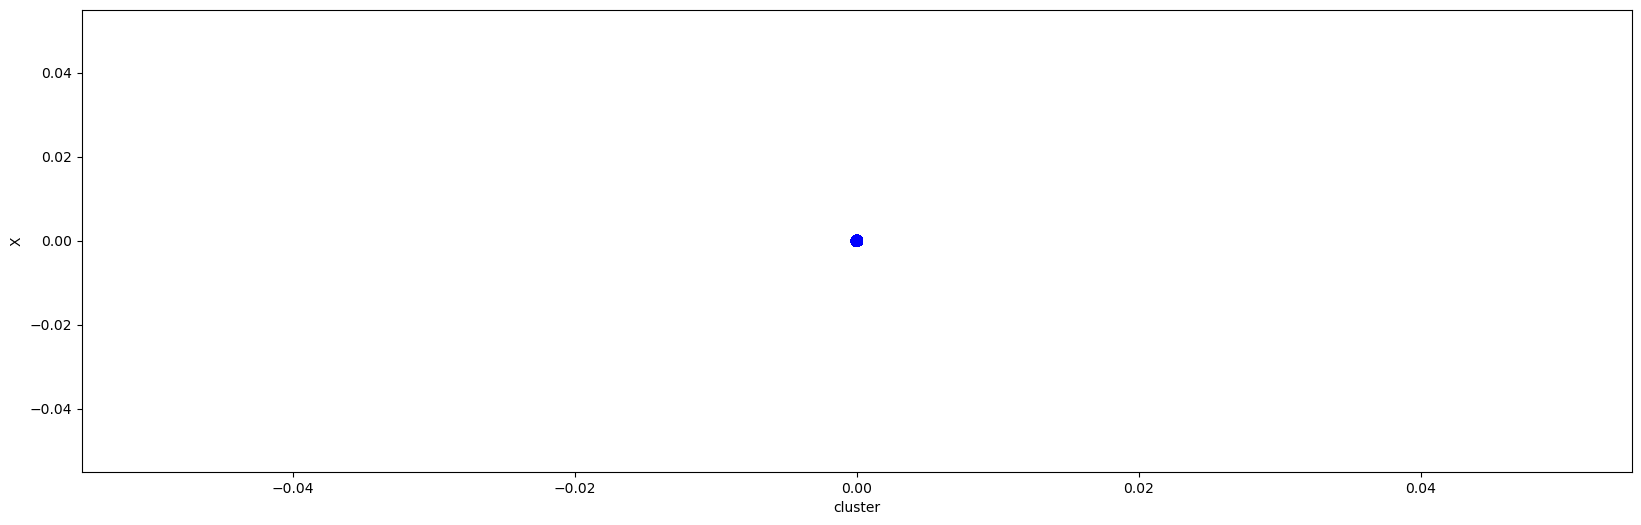

In [170]:
plt.figure(figsize=(20, 6))
#color map to make it pretty
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cm_bright, s=60)
plt.xlabel('cluster')
plt.ylabel('X')
plt.show()

In [171]:
from sklearn.neighbors import KNeighborsClassifier #again scikit_learn library for ML 

In [172]:
#Defining the classifier
clf = KNeighborsClassifier(3)
#Fitting the classifier to our dataset
clf.fit(X, y)
#Predicting new values based on our fitted classifier
predicted_y = clf.predict(X)

#How well does it correspond to the 'real' values?
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != predicted_y).sum()))


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values